In [1]:
import numpy as np 
import pandas as pd 

In [2]:
df = pd.read_csv('/Users/saranya/Documents/ML/Project/data/transactions_train.csv')

In [3]:
df.head(5)

,t_dat,customer_id,article_id,price,sales_channel_id
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,2
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.015237,2
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003,0.016932,2
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004,0.016932,2


In [4]:
df.sort_values('t_dat')
df.tail(5)

,t_dat,customer_id,article_id,price,sales_channel_id
31788319,2020-09-22,fff2282977442e327b45d8c89afde25617d00124d0f999...,929511001,0.059305,2
31788320,2020-09-22,fff2282977442e327b45d8c89afde25617d00124d0f999...,891322004,0.042356,2
31788321,2020-09-22,fff380805474b287b05cb2a7507b9a013482f7dd0bce0e...,918325001,0.043203,1
31788322,2020-09-22,fff4d3a8b1f3b60af93e78c30a7cb4cf75edaf2590d3e5...,833459002,0.006763,1
31788323,2020-09-22,fffef3b6b73545df065b521e19f64bf6fe93bfd450ab20...,898573003,0.033881,2


In [5]:
def query_based_on_date(df, start_date='2020-06-22', end_date='2020-09-22'):
    x = df[(df['t_dat']>start_date) & (df['t_dat']<=end_date)]
    return x



In [6]:
start_date = '2020-05-22'
x = query_based_on_date(df, start_date)
train_x = query_based_on_date(x, start_date, '2020-09-08')
test_x = query_based_on_date(x, '2020-09-08')


In [7]:
print(train_x['t_dat'])
print(test_x['t_dat'])

26148691    2020-05-23
26148692    2020-05-23
26148693    2020-05-23
26148694    2020-05-23
26148695    2020-05-23
               ...    
31292767    2020-09-08
31292768    2020-09-08
31292769    2020-09-08
31292770    2020-09-08
31292771    2020-09-08
Name: t_dat, Length: 5144081, dtype: object
31292772    2020-09-09
31292773    2020-09-09
31292774    2020-09-09
31292775    2020-09-09
31292776    2020-09-09
               ...    
31788319    2020-09-22
31788320    2020-09-22
31788321    2020-09-22
31788322    2020-09-22
31788323    2020-09-22
Name: t_dat, Length: 495552, dtype: object


In [8]:
train_x.shape, test_x.shape

((5144081, 5), (495552, 5))

In [9]:
train_customers = set(train_x['customer_id'].unique().tolist())
test_customers = set(test_x['customer_id'].unique().tolist())
print(len(train_customers), len(test_customers))
print(type(train_customers), type(test_customers))

592574 128333
<class 'set'> <class 'set'>


In [10]:
train_test_overlap = train_customers.intersection(test_customers)
print(len(train_test_overlap) / len(test_customers))

0.7526590978158385


In [11]:
customers_to_remove = test_customers - train_test_overlap 
print(len(customers_to_remove))
test_customers-=customers_to_remove
print(len(test_customers))

31742
96591


In [12]:
def filter_rows_by_values(df, col, values):
    return df[df[col].isin(values)==True]

In [13]:
test_x = filter_rows_by_values(test_x,'customer_id',train_test_overlap)

In [14]:
print(test_x.shape)

(380706, 5)


In [15]:
test_x_temp = test_x.sample(frac = 0.5)
# Creating dataframe with
# rest of the 50% values
val_x = test_x.drop(test_x_temp.index)

In [16]:
print(val_x.shape)
print(test_x_temp.shape)

(190353, 5)
(190353, 5)


In [17]:
test_x = test_x_temp
print(test_x.shape)

(190353, 5)


In [18]:
### training dataset : train_x
### testing dataset : test_x
### validation dataset : val_x

In [19]:
########## VISUALIZATIONS ###########

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

In [21]:
sns.set(rc = {'figure.figsize':(15,8)})

In [22]:
### Visualization for original dataset.
y_original = df['t_dat'].value_counts().rename_axis('date').reset_index(name='Purchases')
y_original["Period"] = pd.to_datetime(y_original["date"])
y_original = y_original.set_index("Period")
y_original["year"] = y_original.index.year
y_original["Month"] = y_original.index.month_name()
y_original["month_number"] = y_original.index.month
y_original = y_original.sort_values('month_number')
y_original.head()

,date,Purchases,year,Month,month_number
Period,,,,,
2020-01-01,2020-01-01,12760,2020,January,1
2020-01-29,2020-01-29,36833,2020,January,1
2019-01-09,2019-01-09,53309,2019,January,1
2020-01-09,2020-01-09,36746,2020,January,1
2020-01-23,2020-01-23,36257,2020,January,1


[Text(0.5, 1.0, 'Purchases over the years 2018-2020')]

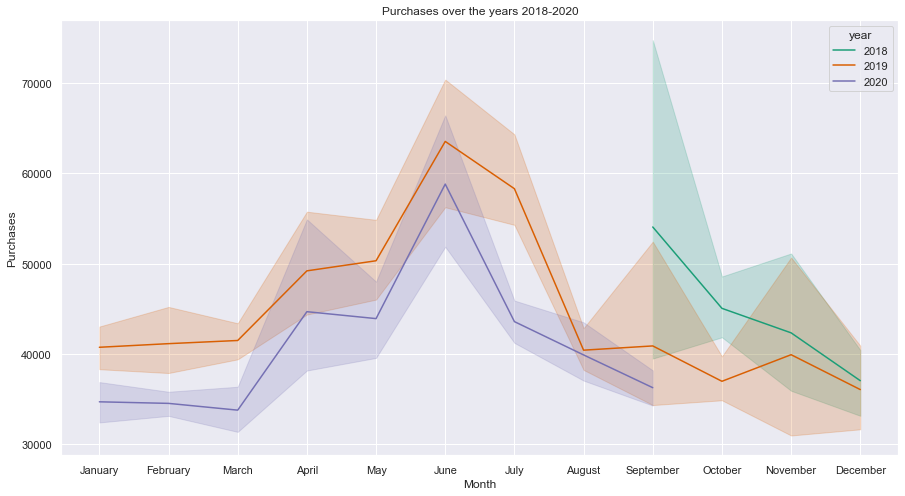

In [23]:
sns.lineplot(x="Month", y="Purchases", data=y_original, hue="year", palette="Dark2").set(title='Purchases over the years 2018-2020')

/var/folders/9q/f8p4mk2s6p7_hhjwtdcgqy380000gn/T/ipykernel_1661/4190322193.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.sort_index will be keyword-only
  pt2.sort_index(1,inplace=True)


[Text(0.5, 1.0, 'Purchases over the years 2018-2020')]

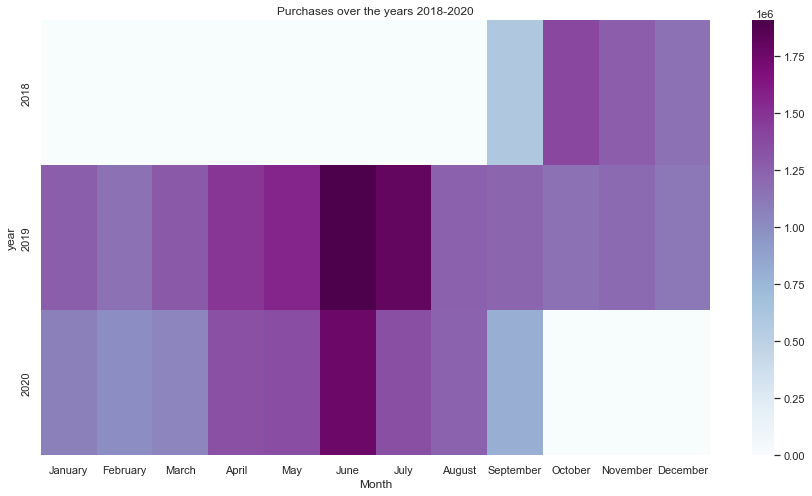

In [24]:
pt2 = y_original.pivot_table(index="year",columns="Month",values="Purchases", aggfunc="sum").fillna(0)
months = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]

pt2.columns = pd.CategoricalIndex(pt2.columns,categories=months)
pt2.sort_index(1,inplace=True)
sns.heatmap(pt2, cmap="BuPu").set(title='Purchases over the years 2018-2020')

In [25]:
y = x['t_dat'].value_counts().rename_axis('date').reset_index(name='Purchases')
y["Period"] = pd.to_datetime(y["date"])
y = y.set_index("Period")
y["year"] = y.index.year
y["Month"] = y.index.month_name()
y["month_number"] = y.index.month
y.head()

,date,Purchases,year,Month,month_number
Period,,,,,
2020-06-17,2020-06-17,110981,2020,June,6
2020-06-24,2020-06-24,98790,2020,June,6
2020-06-25,2020-06-25,88684,2020,June,6
2020-06-18,2020-06-18,84563,2020,June,6
2020-06-26,2020-06-26,77452,2020,June,6


[Text(0.5, 1.0, 'Bar graph for Purchases from May to September (2020)')]

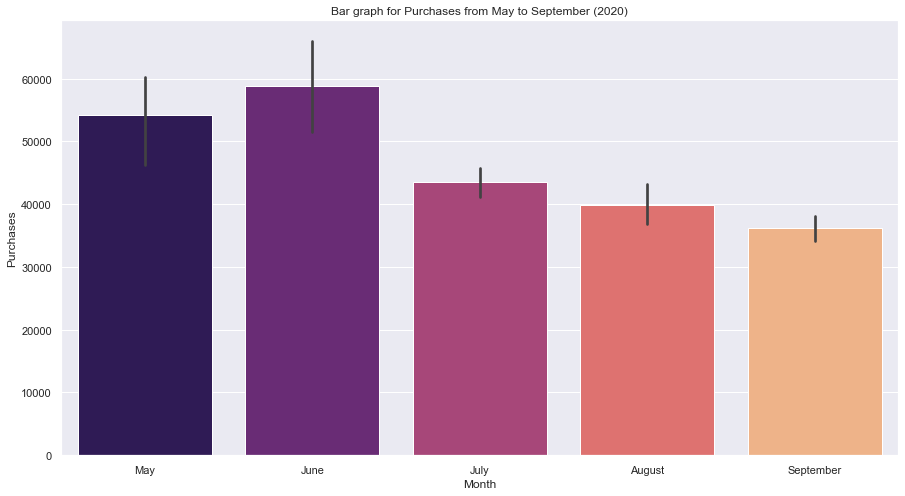

In [26]:
### barplot for sampled dataset (4 months)
y = y.sort_values('month_number')
sns.barplot(x = 'Month', y='Purchases', data = y,  palette = 'magma').set(title='Bar graph for Purchases from May to September (2020)')

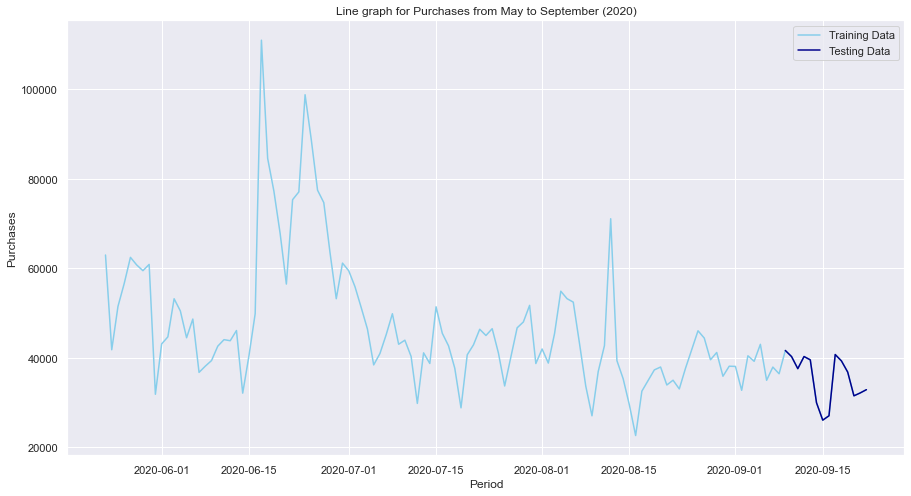

In [27]:
sns.lineplot(x="Period", y="Purchases", data=y, color='skyblue', label="Training Data") # plot normal time series plot
# plot subset on top of the normal time series
g=sns.lineplot(x="Period",y="Purchases",data=y[(y['date'] > '2020-09-08') & (y['date'] <= '2020-09-22')], color='darkblue', label="Testing Data").set(title='Line graph for Purchases from May to September (2020)')

In [29]:
df_articles = pd.read_csv('/Users/saranya/Documents/ML/Project/data/articles.csv')
df_customers = pd.read_csv('/Users/saranya/Documents/ML/Project/data/customers.csv')

In [60]:
sample_x = query_based_on_date(x, '2020-09-18')

In [61]:
df_test = pd.merge(df_articles, sample_x, on=['article_id'], how='left') 
df_test_merged = pd.merge(df_test, df_customers, on=['customer_id'], how='left')  

In [ ]:
y_product_group = df_test_merged['product_group_name'].value_counts().rename_axis('Product group').reset_index(name='Purchases').head(5)
y_product_group_list = list(y_product_group['Product group'])
df_prod_filtered = filter_rows_by_values(df_test_merged,'product_group_name',y_product_group_list)

Text(0, 0.5, 'Price')

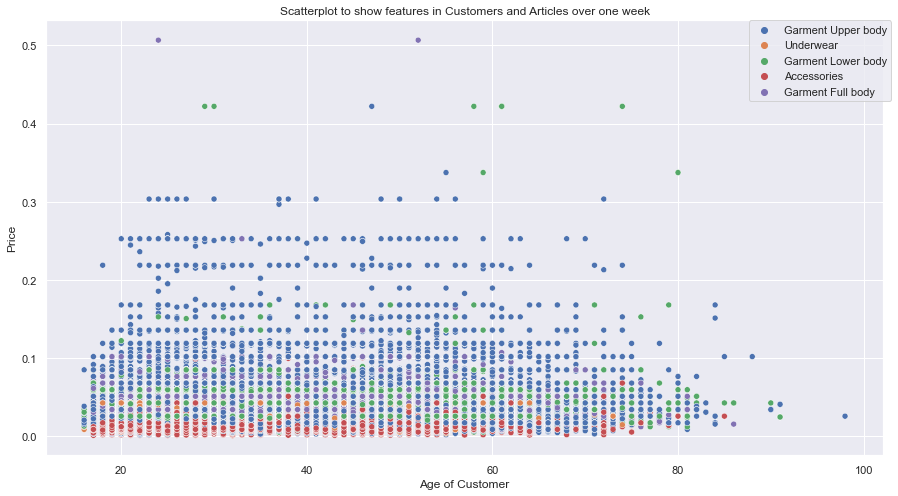

In [78]:
## Scatterplot
sns.scatterplot(data = df_prod_filtered, x = "age", y = "price", hue = "product_group_name")
plt.legend(bbox_to_anchor=(1.01, 1),
           borderaxespad=0)
plt.title("Scatterplot to show features in Customers and Articles over one week")
plt.xlabel("Age of Customer")
plt.ylabel("Price")